## Building Neural Network using model subclassing in TF

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
train_data.shape,test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
# Normalize the data
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

Label:  5


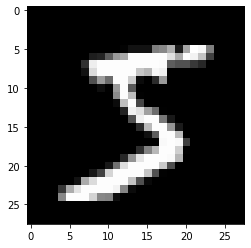

In [9]:
print("Label: ",train_labels[0])
plt.imshow(train_data[0],cmap='gray')

In [12]:
class MNIST(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.f = layers.Flatten()
    self.dense1 = layers.Dense(64,activation='relu')
    self.dense2 = layers.Dense(128,activation='relu')
    self.dense3 = layers.Dense(10,activation='softmax')

  def call(self,inputs):
    out = self.f(inputs)
    out = self.dense1(out)
    out = self.dense2(out)
    out = self.dense3(out)
    return out

In [13]:
model = MNIST()

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_data, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0875 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0680 - accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0401 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.026

In [16]:
model.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1129 - accuracy: 0.9713


[0.11290255188941956, 0.9713000059127808]

In [21]:
def predict_single(img):
  x = image.reshape(-1,784)
  ans = model.predict(x)
  pred = np.argmax(ans)
  return pred

Predict:  4
Label:  4


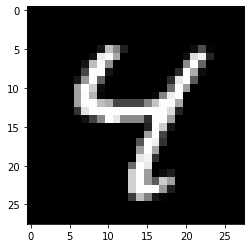

In [24]:
i = 6
image = test_data[i]
label = test_labels[i]
plt.imshow(image,cmap='gray')
print("Predict: ", predict_single(image))
print("Label: ",label)